<h1><center> Barbell Graph </center> </h1>


This is the code for the Barbell Graph experiment described in figure 3 of the paper.


## I. Create the graph and visualize

(Unfortunately, the nx.draw(G) does not yield a very clean picture, but we basically have two cliques of densely connected nodes, linked by a chain)

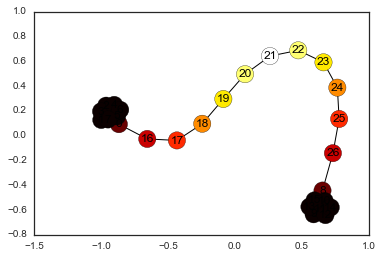

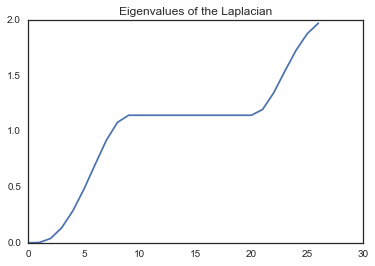

In [6]:
%matplotlib inline
#### Tests like paper
import numpy as np
import networkx as nx 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans



import os,sys
sys.path.append( '../../../GraphWave/')
dirpath_default=os.getcwd()
from distances.distances_between_graphs import *
from distances.distances_signature import *
from shapes.shapes import *
from heat_diffusion import *
import pickle
from performance_evaluation.purity import *
from characteristic_functions import *
from graphwave import *


name_graph='barbell'
sb.set_style('white')
G,colors=barbel_graph(start=0,N1=8, N2=5,plot=True,savefig=False)
N=nx.number_of_nodes(G)
Gg = pygsp.graphs.Graph(nx.adjacency_matrix(G))
Gg.create_laplacian("normalized")
Gg.lap_type="normalized"
Gg.compute_fourier_basis(force_recompute=True)
eigenvec=Gg.e
plt.figure()
plt.plot(eigenvec)
plt.title('Eigenvalues of the Laplacian')

In [7]:
chi,heat_print, taus=graphwave(G, taus=range(19,21), verbose=True)

2017-11-05 10:19:48,003:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-11-05 10:19:48,006:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,013:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,021:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,026:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,032:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,038:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,056:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,081:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,135:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:19:48,146:[INFO](pygsp.filters.filter.analysis): The analysis method

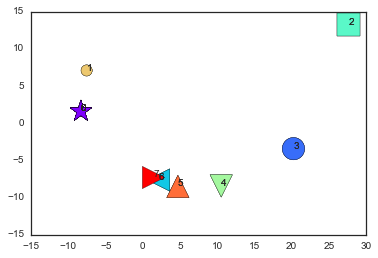

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
nb_clust=len(np.unique(colors))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))
km=sk.cluster.KMeans(n_clusters=nb_clust)
km.fit(trans_data)
labels_pred=km.labels_
######## Params for plotting
cmapx=plt.get_cmap('rainbow')
x=np.linspace(0,1,np.max(labels_pred)+1)
col=[cmapx(xx) for xx in x ]
markers = {0:'*',1: '.', 2:',',3: 'o',4: 'v',5: '^',6: '<',7: '>',8: 3 ,9:'d',10: '+',11:'x',12:'D',13: '|',14: '_',15:4,16:0,17:1,18:2,19:6,20:7}
########

for c in np.unique(colors):
        indc=[i for i,x in enumerate(colors) if x==c]
        #print indc
        plt.scatter(trans_data[indc,0], trans_data[indc,1],c=np.array(col)[list(np.array(labels_pred)[indc])] ,marker=markers[c%len(markers)],s=500)
labels = colors
for label,c, x, y in zip(labels,labels_pred, trans_data[:, 0], trans_data[:, 1]):
            plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
  